### Connect to Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, log_loss
import matplotlib.pyplot as plt

## 1. Data Extraction

**Extract Data**

In [ ]:
batch1213_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1213-data-GRADED.xlsx',
                             skiprows=5)
batch1213_preuniversity_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1213-data-GRADED.xlsx',
                                           skiprows=4, sheet_name='preuni')
batch1213_professional1_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1213-data-GRADED.xlsx',
                                           skiprows=2, sheet_name='pro1')

batch1314_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1314-data-GRADED.xlsx',
                             skiprows=5)
batch1314_preuniversity_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1314-data-GRADED.xlsx',
                                           skiprows=4, sheet_name='preuni')
batch1314_professional1_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1314-data-GRADED.xlsx',
                                           skiprows=5, sheet_name='pro1')

batch1415_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1415-data-GRADED.xlsx',
                             skiprows=5)
batch1415_preuniversity_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1415-data-GRADED.xlsx',
                                           skiprows=4, sheet_name= 'preuni')
batch1415_professional1_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1415-data-GRADED.xlsx',
                                           skiprows=2, sheet_name= 'pro1')

batch1516_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1516-data-graded.xlsx',
                             skiprows=5)
batch1516_preuniversity_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1516-data-graded.xlsx',
                                           skiprows=4, sheet_name='preuni')
batch1516_professional1_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1516-data-graded.xlsx',
                                           skiprows=2, sheet_name='pro1')

batch1617_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1617-data-GRADED.xlsx',
                             skiprows=5)
batch1617_preuniversity_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1617-data-GRADED.xlsx',
                                           skiprows=5, sheet_name= 'preuni')
batch1617_professional1_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1617-data-GRADED.xlsx',
                                           skiprows=5, sheet_name= 'pro1')


In [ ]:
batch1213_part1_df = pd.merge(batch1213_df,
                              batch1213_preuniversity_df,
                              on = "STUDENT'S IDENTITY NO. ")
batch1213_part2_df = batch1213_professional1_df
batch1213_all_df = pd.merge(batch1213_part1_df,
                               batch1213_part2_df,
                               on = "STUDENT'S IDENTITY NO. ")


batch1314_part1_df = pd.merge(batch1314_df,
                              batch1314_preuniversity_df,
                              on = "STUDENT'S IDENTITY NO. ")
batch1314_part2_df = batch1314_professional1_df

batch1314_all_df = pd.merge(batch1314_part1_df,
                               batch1314_part2_df,
                               on = "STUDENT'S IDENTITY NO. ")


batch1415_part1_df = pd.merge(batch1415_df,
                              batch1415_preuniversity_df,
                              on = "STUDENT'S IDENTITY NO. ")
batch1415_part2_df = batch1415_professional1_df

batch1415_all_df = pd.merge(batch1415_part1_df,
                            batch1415_part2_df,
                            on = "STUDENT'S IDENTITY NO. ")


batch1516_part1_df = pd.merge(batch1516_df,
                              batch1516_preuniversity_df,
                              on = "STUDENT'S IDENTITY NO. ")
batch1516_part2_df = batch1516_professional1_df

batch1516_all_df = pd.merge(batch1516_part1_df,
                            batch1516_part2_df,
                            on = "STUDENT'S IDENTITY NO. ")


batch1617_part1_df = pd.merge(batch1617_df,
                              batch1617_preuniversity_df,
                              on = "STUDENT'S IDENTITY NO. ")

batch1617_part2_df = batch1617_professional1_df

batch1617_all_df = pd.merge(batch1617_part1_df,
                            batch1617_part2_df,
                            on = "STUDENT'S IDENTITY NO. ")



## 2. Data Preparation

**Combine Preprocessed Data**

In [ ]:
data_df = pd.concat([batch1213_all_df, batch1314_all_df, batch1415_all_df, batch1516_all_df, batch1617_all_df])
data_df.head()

,NO._x,STUDENT'S IDENTITY NO.,LAST DIGIT MATRIC NO.,GENDER,AGE DURING ADMISSION,BIRTH DATE,MIDDLE IC NO.,DISTRICT,POSCODE,STATE,...,SEM 6,ORAL BIOLOGY RESIT,RESIT STATUS,SEM 4,ANATOMY RESIT,PHYSIOLOGY RESIT,RESIT STATUS.1,BIOCHEMISTRY RESIT,RESIT STATUS.2,RESIT STATUS.3
0,1,11-12-10,7,MALE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,12-13-01,8,FEMALE,21.0,911122,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,12-13-02,6,FEMALE,20.0,920816,3.0,BACHOK,16370,KELANTAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,12-13-03,6,FEMALE,20.0,920522,6.0,JERANTUT,27020,PAHANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,12-13-04,4,FEMALE,20.0,920625,8.0,PUCHONG,47100,SELANGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 58
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NO._x                    285 non-null    int64  
 1   STUDENT'S IDENTITY NO.   285 non-null    object 
 2   LAST DIGIT MATRIC NO.    285 non-null    int64  
 3   GENDER                   285 non-null    object 
 4   AGE DURING ADMISSION     278 non-null    float64
 5   BIRTH DATE               220 non-null    object 
 6   MIDDLE IC NO.            59 non-null     float64
 7   DISTRICT                 277 non-null    object 
 8   POSCODE                  268 non-null    object 
 9   STATE                    279 non-null    object 
 10  COUNTRY                  281 non-null    object 
 11  NO._y                    285 non-null    int64  
 12  PRE-UNIVERSITY           264 non-null    object 
 13   SEM 1                   258 non-null    float64
 14  SEM 2                    258 non

In [ ]:
df_copy = data_df.copy()

**Cek missing value**

In [ ]:
df_copy.isnull().sum()

NO._x                        0
STUDENT'S IDENTITY NO.       0
LAST DIGIT MATRIC NO.        0
GENDER                       0
AGE DURING ADMISSION         7
BIRTH DATE                  65
MIDDLE IC NO.              226
DISTRICT                     8
POSCODE                     17
STATE                        6
COUNTRY                      4
NO._y                        0
PRE-UNIVERSITY              21
 SEM 1                      27
SEM 2                       27
SEM 3                       27
SEM 4                       94
SEM 5                      158
TOTAL_SEM                   27
AVERAGE_CGPA                27
FINAL_CGPA                  27
NO.                          0
ANATOMY MARK                 0
GRADING                      0
ANATOMY STATUS               0
PHYSIOLOGY MARK              0
GRADING.1                    0
PHYSIOLOGY STATUS            0
BIOCHEMISTRY MARK            0
GRADING.2                    0
BIOCHEMISTRY STATUS          0
ORAL BIOLOGY MARK            0
GRADING.

**Remove unncessary variables**

In [ ]:
df_copy = df_copy.drop(['RESIT STATUS.3', 'RESIT STATUS.1','PHYSIOLOGY RESIT','ORAL BIOLOGY RESIT','RESIT STATUS.2','BIOCHEMISTRY RESIT','SEM 6',
              'ANATOMY RESIT','RESIT STATUS','BIRTH DATE','SEM 4','MIDDLE IC NO.','SEM 5',' SEM 4', ' BIRTH DATE', 'NO._x', 'LAST DIGIT MATRIC NO.', 'NO._y', 'NO.','DISTRICT', 'STATE', 'COUNTRY','PRE-UNIVERSITY','ANATOMY STATUS','PHYSIOLOGY STATUS',
         'ORAL BIOLOGY STATUS', 'BIOCHEMISTRY STATUS'], axis=1)

In [ ]:
df_copy = df_copy.drop(['GENDER', 'POSCODE', ' SEM 1', 'SEM 2', 'SEM 3', 'ANATOMY MARK', 'PHYSIOLOGY MARK', 'GRADING', 'BIOCHEMISTRY MARK', 'GRADING.1', 'ORAL BIOLOGY MARK', 'GRADING.2', 'MIDDLE I/C NO.'], axis=1)

In [ ]:
df_copy = df_copy.drop("STUDENT'S IDENTITY NO. ", axis=1)

**Handling Missing values**

In [ ]:
df_data = df_copy.dropna()

In [ ]:
df_data.isnull().sum()

AGE DURING ADMISSION    0
TOTAL_SEM               0
AVERAGE_CGPA            0
FINAL_CGPA              0
GRADING.3               0
dtype: int64

In [ ]:
df_data.head()

,AGE DURING ADMISSION,TOTAL_SEM,AVERAGE_CGPA,FINAL_CGPA,GRADING.3
1,21.0,4.0,3.4825,3.63,C
2,20.0,5.0,3.6980,3.72,B
3,20.0,5.0,3.4600,3.60,C
4,20.0,5.0,3.6820,3.79,B
5,20.0,5.0,3.5260,3.68,C


## Split Data

In [ ]:
x = df_data.drop("GRADING.3", axis =1)
y = df_data['GRADING.3']
x = x.values
x

array([[21.        ,  4.        ,  3.4825    ,  3.63      ],
       [20.        ,  5.        ,  3.698     ,  3.72      ],
       [20.        ,  5.        ,  3.46      ,  3.6       ],
       ...,
       [20.        ,  5.        ,  4.        ,  4.        ],
       [20.        ,  5.        ,  3.514     ,  3.51      ],
       [19.        ,  3.        ,  3.68333333,  3.66      ]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2022)

**Divide the data into train and test data**

In [ ]:
y_train.value_counts()

GRADING.3
B    100
C     35
A     18
F      1
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

GRADING.3
B    59
C    35
A     7
F     3
Name: count, dtype: int64

## 4. Modeling

**Handle imbalanced data using resampling method**

In [ ]:
from imblearn.over_sampling import SMOTE

### 4.1 Logistic Regression

In [ ]:
# Model Development
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_train)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        18
           B       0.65      1.00      0.79       100
           C       1.00      0.03      0.06        35
           F       0.00      0.00      0.00         1

    accuracy                           0.66       154
   macro avg       0.41      0.26      0.21       154
weighted avg       0.65      0.66      0.53       154

[[  0  18   0   0]
 [  0 100   0   0]
 [  0  34   1   0]
 [  0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
y_pred = log_reg.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         7
           B       0.57      1.00      0.72        59
           C       0.00      0.00      0.00        35
           F       0.00      0.00      0.00         3

    accuracy                           0.57       104
   macro avg       0.14      0.25      0.18       104
weighted avg       0.32      0.57      0.41       104

[[ 0  7  0  0]
 [ 0 59  0  0]
 [ 0 35  0  0]
 [ 0  3  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


False Positive Rate for each class: [0. 1. 0. 0.]
Macro-average FPR: 0.25
Micro-average FPR: 0.14423076923076922
Weighted-average FPR: 0.5673076923076923
Logarithmic Loss on Test Set: 0.9863358331843849


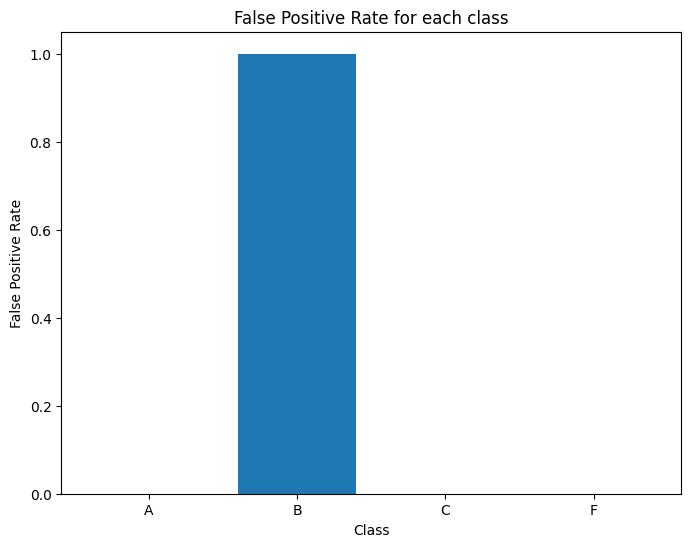

In [ ]:
# Compute False Positive Rate
def calculate_false_positive_rate(conf_matrix):
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    tn = conf_matrix.sum() - (conf_matrix.sum(axis=0) + conf_matrix.sum(axis=1) - np.diag(conf_matrix))
    fp_rate = fp / (fp + tn)
    return fp_rate

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Calculate False Positive Rate (FPR)
fp_rate = calculate_false_positive_rate(conf_matrix_test)
print("False Positive Rate for each class:", fp_rate)

# Calculate Macro-average FPR
macro_avg_fpr = np.mean(fp_rate)
print("Macro-average FPR:", macro_avg_fpr)

# Micro-average FPR
total_fp = np.sum(conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test))
total_tn = np.sum(conf_matrix_test.sum() - (conf_matrix_test.sum(axis=0) + conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test)))
micro_avg_fpr = total_fp / (total_fp + total_tn)
print("Micro-average FPR:", micro_avg_fpr)

# Weighted-average FPR
class_counts = np.sum(conf_matrix_test, axis=1)
weighted_avg_fpr = np.sum(fp_rate * class_counts) / np.sum(class_counts)
print("Weighted-average FPR:", weighted_avg_fpr)

# Calculate Logarithmic Loss
log_loss_test = log_loss(y_test, log_reg.predict_proba(x_test))
print("Logarithmic Loss on Test Set:", log_loss_test)

# Visualize False Positive Rate
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(fp_rate)), fp_rate)
plt.xlabel('Class')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate for each class')
plt.xticks(np.arange(len(fp_rate)), np.unique(y_test))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1,)
f1 = f1_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro', zero_division=1)

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.5673076923076923
Precision (macro average): 0.8918269230769231
f1_score (macro average): 0.18098159509202455
recall (macro average): 0.25


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = log_reg.predict(x_train)

accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions, average='micro')
f1 = f1_score(y_train, predictions, average='micro')
recall = recall_score(y_train, predictions, average='micro')

print("Acurracy (micro average):", accuracy)
print("Precision (micro average):", precision)
print("f1_score (micro average):", f1)
print("recall (micro average):", recall)

Acurracy (micro average): 0.6558441558441559
Precision (micro average): 0.6558441558441559
f1_score (micro average): 0.6558441558441559
recall (micro average): 0.6558441558441559


### 4.2 Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5,random_state= 2022)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

              precision    recall  f1-score   support

           A       0.90      0.50      0.64        18
           B       0.70      0.99      0.82       100
           C       1.00      0.09      0.16        35
           F       0.00      0.00      0.00         1

    accuracy                           0.72       154
   macro avg       0.65      0.39      0.41       154
weighted avg       0.79      0.72      0.64       154

[[ 9  9  0  0]
 [ 1 99  0  0]
 [ 0 32  3  0]
 [ 0  1  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.29      0.29      0.29         7
           B       0.56      0.92      0.69        59
           C       0.00      0.00      0.00        35
           F       0.00      0.00      0.00         3

    accuracy                           0.54       104
   macro avg       0.21      0.30      0.24       104
weighted avg       0.34      0.54      0.41       104

[[ 2  5  0  0]
 [ 5 54  0  0]
 [ 0 35  0  0]
 [ 0  3  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


False Positive Rate for each class: [0.05154639 0.95555556 0.         0.        ]
Macro-average FPR: 0.2517754868270332
Micro-average FPR: 0.15384615384615385
Weighted-average FPR: 0.5455634857696714
Logarithmic Loss on Test Set: 5.450362603034612


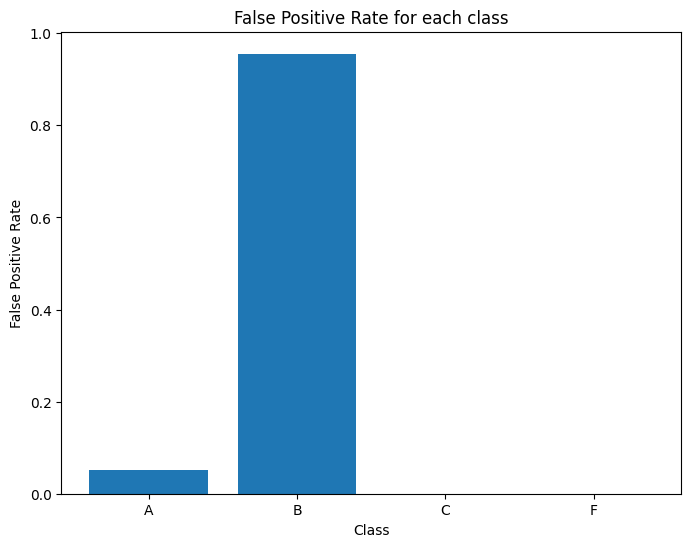

In [ ]:
# Compute False Positive Rate
def calculate_false_positive_rate(conf_matrix):
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    tn = conf_matrix.sum() - (conf_matrix.sum(axis=0) + conf_matrix.sum(axis=1) - np.diag(conf_matrix))
    fp_rate = fp / (fp + tn)
    return fp_rate

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Calculate False Positive Rate
fp_rate = calculate_false_positive_rate(conf_matrix_test)
print("False Positive Rate for each class:", fp_rate)

# Calculate Macro-average FPR
macro_avg_fpr = np.mean(fp_rate)
print("Macro-average FPR:", macro_avg_fpr)

# Micro-average FPR
total_fp = np.sum(conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test))
total_tn = np.sum(conf_matrix_test.sum() - (conf_matrix_test.sum(axis=0) + conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test)))
micro_avg_fpr = total_fp / (total_fp + total_tn)
print("Micro-average FPR:", micro_avg_fpr)

# Weighted-average FPR
class_counts = np.sum(conf_matrix_test, axis=1)
weighted_avg_fpr = np.sum(fp_rate * class_counts) / np.sum(class_counts)
print("Weighted-average FPR:", weighted_avg_fpr)

# Calculate Logarithmic Loss
log_loss_test = log_loss(y_test, clf.predict_proba(x_test))
print("Logarithmic Loss on Test Set:", log_loss_test)

# Visualize False Positive Rate
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(fp_rate)), fp_rate)
plt.xlabel('Class')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate for each class')
plt.xticks(np.arange(len(fp_rate)), np.unique(y_test))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1,)
f1 = f1_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro', zero_division=1)

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.5384615384615384
Precision (macro average): 0.7106038291605302
f1_score (macro average): 0.2445054945054945
recall (macro average): 0.30024213075060535


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf.predict(x_train)

accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions, average='micro')
f1 = f1_score(y_train, predictions, average='micro')
recall = recall_score(y_train, predictions, average='micro')

print("Acurracy (micro average):", accuracy)
print("Precision (micro average):", precision)
print("f1_score (micro average):", f1)
print("recall (micro average):", recall)

Acurracy (micro average): 0.7207792207792207
Precision (micro average): 0.7207792207792207
f1_score (micro average): 0.7207792207792207
recall (micro average): 0.7207792207792207


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    clf,
    out_file = "Oral Biology Mark.dot",
    feature_names = ['AGE DURING ADMISSION', 'TOTAL_SEM', 'AVERAGE_CGPA', 'FINAL_CGPA'],
    class_names = ['A','B', 'C', 'F' ],
    rounded= True,
    filled =True)

### 4.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=5,random_state= 2022)
clf1 = clf1.fit(x_train, y_train)

y_pred = clf1.predict(x_train)
y_pred

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.33      0.50        18
           B       0.71      1.00      0.83       100
           C       1.00      0.23      0.37        35
           F       0.00      0.00      0.00         1

    accuracy                           0.74       154
   macro avg       0.68      0.39      0.43       154
weighted avg       0.81      0.74      0.68       154

[[  6  12   0   0]
 [  0 100   0   0]
 [  0  27   8   0]
 [  0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = clf1.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.40      0.29      0.33         7
           B       0.56      0.92      0.70        59
           C       0.33      0.03      0.05        35
           F       0.00      0.00      0.00         3

    accuracy                           0.55       104
   macro avg       0.32      0.31      0.27       104
weighted avg       0.46      0.55      0.44       104

[[ 2  5  0  0]
 [ 3 54  2  0]
 [ 0 34  1  0]
 [ 0  3  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


False Positive Rate for each class: [0.03092784 0.93333333 0.02898551 0.        ]
Macro-average FPR: 0.24831166890781414
Micro-average FPR: 0.15064102564102563
Weighted-average FPR: 0.5413235987081797
Logarithmic Loss on Test Set: 1.0680123887176287


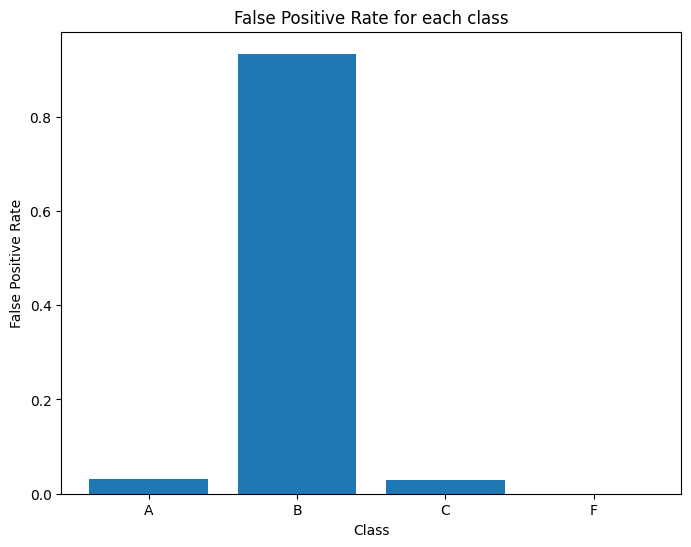

In [ ]:
# Compute False Positive Rate
def calculate_false_positive_rate(conf_matrix):
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    tn = conf_matrix.sum() - (conf_matrix.sum(axis=0) + conf_matrix.sum(axis=1) - np.diag(conf_matrix))
    fp_rate = fp / (fp + tn)
    return fp_rate

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Calculate False Positive Rate
fp_rate = calculate_false_positive_rate(conf_matrix_test)
print("False Positive Rate for each class:", fp_rate)

# Calculate Macro-average FPR
macro_avg_fpr = np.mean(fp_rate)
print("Macro-average FPR:", macro_avg_fpr)

# Micro-average FPR
total_fp = np.sum(conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test))
total_tn = np.sum(conf_matrix_test.sum() - (conf_matrix_test.sum(axis=0) + conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test)))
micro_avg_fpr = total_fp / (total_fp + total_tn)
print("Micro-average FPR:", micro_avg_fpr)

# Weighted-average FPR
class_counts = np.sum(conf_matrix_test, axis=1)
weighted_avg_fpr = np.sum(fp_rate * class_counts) / np.sum(class_counts)
print("Weighted-average FPR:", weighted_avg_fpr)

# Calculate Logarithmic Loss
log_loss_test = log_loss(y_test, clf1.predict_proba(x_test))
print("Logarithmic Loss on Test Set:", log_loss_test)

# Visualize False Positive Rate
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(fp_rate)), fp_rate)
plt.xlabel('Class')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate for each class')
plt.xticks(np.arange(len(fp_rate)), np.unique(y_test))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf1.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1,)
f1 = f1_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro', zero_division=1)

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.5480769230769231
Precision (macro average): 0.5739583333333333
f1_score (macro average): 0.2706847764572722
recall (macro average): 0.30738498789346247


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf1.predict(x_train)

accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions, average='micro')
f1 = f1_score(y_train, predictions, average='micro')
recall = recall_score(y_train, predictions, average='micro')

print("Acurracy (micro average):", accuracy)
print("Precision (micro average):", precision)
print("f1_score (micro average):", f1)
print("recall (micro average):", recall)

Acurracy (micro average): 0.7402597402597403
Precision (micro average): 0.7402597402597403
f1_score (micro average): 0.7402597402597403
recall (micro average): 0.7402597402597403


### 4.4 Support Vector Machine (SVM)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf2.fit(x_train, y_train)

y_pred = clf2.predict(x_train)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.11      0.20        18
           B       0.66      1.00      0.80       100
           C       1.00      0.03      0.06        35
           F       0.00      0.00      0.00         1

    accuracy                           0.67       154
   macro avg       0.67      0.28      0.26       154
weighted avg       0.77      0.67      0.55       154

[[  2  16   0   0]
 [  0 100   0   0]
 [  0  34   1   0]
 [  0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = clf2.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         7
           B       0.57      1.00      0.72        59
           C       0.00      0.00      0.00        35
           F       0.00      0.00      0.00         3

    accuracy                           0.57       104
   macro avg       0.14      0.25      0.18       104
weighted avg       0.32      0.57      0.41       104

[[ 0  7  0  0]
 [ 0 59  0  0]
 [ 0 35  0  0]
 [ 0  3  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


False Positive Rate for each class: [0. 1. 0. 0.]
Macro-average FPR: 0.25
Micro-average FPR: 0.14423076923076922
Weighted-average FPR: 0.5673076923076923


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Logarithmic Loss on Test Set: 0.948744028812341


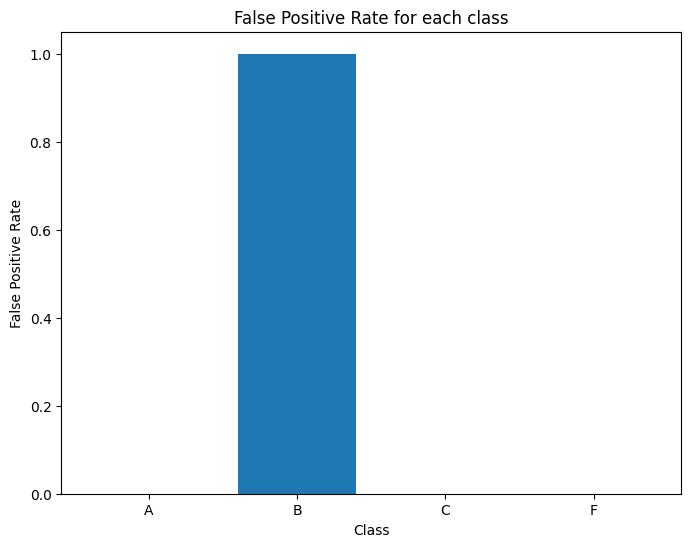

In [ ]:
# Compute False Positive Rate
def calculate_false_positive_rate(conf_matrix):
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    tn = conf_matrix.sum() - (conf_matrix.sum(axis=0) + conf_matrix.sum(axis=1) - np.diag(conf_matrix))
    fp_rate = fp / (fp + tn)
    return fp_rate

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Calculate False Positive Rate
fp_rate = calculate_false_positive_rate(conf_matrix_test)
print("False Positive Rate for each class:", fp_rate)

# Calculate Macro-average FPR
macro_avg_fpr = np.mean(fp_rate)
print("Macro-average FPR:", macro_avg_fpr)

# Micro-average FPR
total_fp = np.sum(conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test))
total_tn = np.sum(conf_matrix_test.sum() - (conf_matrix_test.sum(axis=0) + conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test)))
micro_avg_fpr = total_fp / (total_fp + total_tn)
print("Micro-average FPR:", micro_avg_fpr)

# Weighted-average FPR
class_counts = np.sum(conf_matrix_test, axis=1)
weighted_avg_fpr = np.sum(fp_rate * class_counts) / np.sum(class_counts)
print("Weighted-average FPR:", weighted_avg_fpr)

# Calculate decision scores for each class
decision_scores = clf2.decision_function(x_test)

# Convert decision scores into probabilities using Platt scaling
from sklearn.calibration import CalibratedClassifierCV

calibrated_clf = CalibratedClassifierCV(clf2, method='sigmoid')
calibrated_clf.fit(x_train, y_train)
probabilities = calibrated_clf.predict_proba(x_test)

# Calculate Logarithmic Loss
log_loss_test = log_loss(y_test, probabilities)
print("Logarithmic Loss on Test Set:", log_loss_test)

# Visualize False Positive Rate
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(fp_rate)), fp_rate)
plt.xlabel('Class')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate for each class')
plt.xticks(np.arange(len(fp_rate)), np.unique(y_test))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf2.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1,)
f1 = f1_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro', zero_division=1)

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.5673076923076923
Precision (macro average): 0.8918269230769231
f1_score (macro average): 0.18098159509202455
recall (macro average): 0.25


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf2.predict(x_train)

accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions, average='micro')
f1 = f1_score(y_train, predictions, average='micro')
recall = recall_score(y_train, predictions, average='micro')

print("Acurracy (micro average):", accuracy)
print("Precision (micro average):", precision)
print("f1_score (micro average):", f1)
print("recall (micro average):", recall)

Acurracy (micro average): 0.6688311688311688
Precision (micro average): 0.6688311688311688
f1_score (micro average): 0.6688311688311688
recall (micro average): 0.6688311688311688
